Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("baseball.csv")

In [3]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


load the data sets

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

above is the list of all columns

In [5]:
df.rename({'W':'Wins', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles',
             '3B':'Triples', 'HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed',
             'ER':'Earned Runs','ERA':'Earned Run Average (ERA)', 'CG':'Complete Game', 'SHO':'Shutouts', 
             'SV':'Saves', 'E':'Errors'},axis=1,inplace=True)

Rename all columns for better understanding

In [6]:
df.shape

(30, 17)

our datasets has 30 rows and 17 columns

In [7]:
df.dtypes

Wins                          int64
Runs                          int64
At Bats                       int64
Hits                          int64
Doubles                       int64
Triples                       int64
Homeruns                      int64
Walks                         int64
Strikeouts                    int64
Stolen Bases                  int64
Runs Allowed                  int64
Earned Runs                   int64
Earned Run Average (ERA)    float64
Complete Game                 int64
Shutouts                      int64
Saves                         int64
Errors                        int64
dtype: object

Our dataset contains only numberic values in it, hence data types is either int64 or float64.

In [8]:
df.isnull().sum()

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Game               0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

Datasets does not contain any missing values.Lets see it with visualization

<AxesSubplot:>

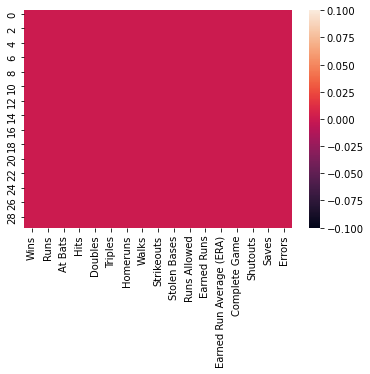

In [9]:
sns.heatmap(df.isnull())

# Let's do some Viasualization:

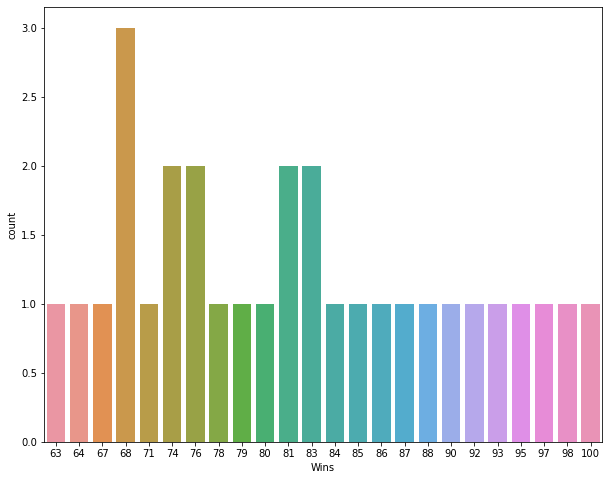

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df['Wins'])
plt.show()


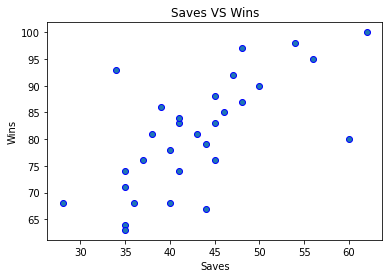

In [11]:
plt.scatter(df['Saves'], df['Wins'],edgecolor="blue")
plt.title('Saves VS Wins')
plt.xlabel('Saves')
plt.ylabel('Wins')
plt.show()

We can see positive relationship between Saves and Wins

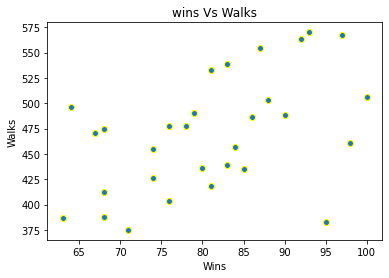

In [12]:
plt.scatter(df['Wins'],df['Walks'],edgecolor='yellow')
plt.title('wins Vs Walks')
plt.xlabel('Wins')
plt.ylabel('Walks')
plt.show()

With Walks also we can see some positive linear relationship.

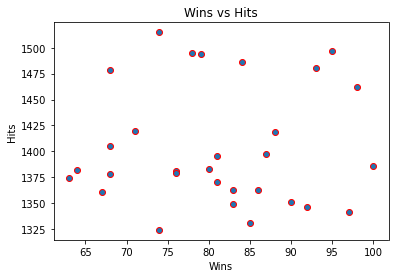

In [13]:
plt.scatter(df['Wins'],df['Hits'],edgecolor='red')
plt.title('Wins vs Hits')
plt.xlabel('Wins')
plt.ylabel('Hits')
plt.show()

Hits column has neither positive nor negative relation with our target columns(Wins)

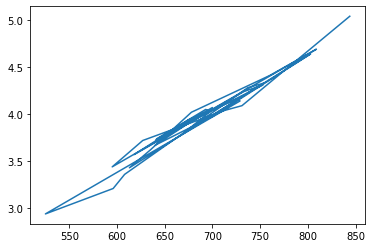

In [14]:
plt.plot(df['Runs Allowed'],df['Earned Run Average (ERA)'])
plt.show()

We can see positive linear relationship between Runs Allowed and Earned Run Average (ERA) column.

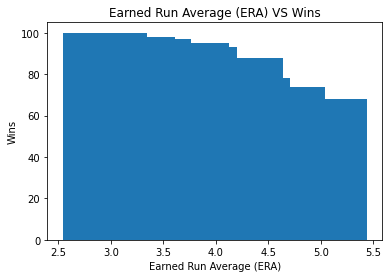

In [15]:
plt.bar(df['Earned Run Average (ERA)'], df['Wins'])
plt.title('Earned Run Average (ERA) VS Wins')
plt.xlabel('Earned Run Average (ERA)')
plt.ylabel('Wins')
plt.show()

We can see when Wins are getting increase, Earned run Average(ERA) is getting decreased.

<AxesSubplot:ylabel='Frequency'>

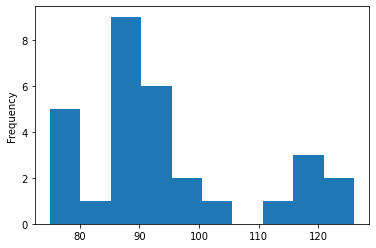

In [16]:
df['Errors'].plot.hist()

Frequency of error is as low as 1 and as high as 9 where in the range starts from around 75 and ends around 125.

<AxesSubplot:ylabel='Frequency'>

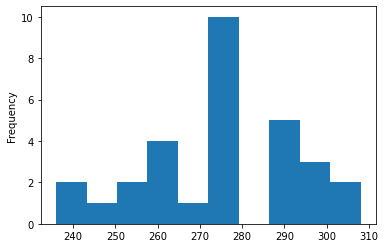

In [17]:
df['Doubles'].plot.hist()

Double column is ranging from around 235 to 308 with lowest frequency of 1 and highest frequency of 10.

<AxesSubplot:ylabel='Frequency'>

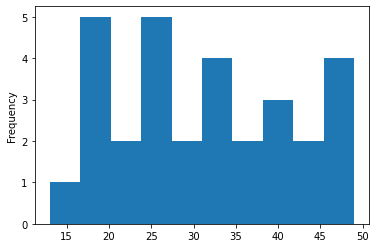

In [18]:
df['Triples'].plot.hist()

Triple column is ranging around 13 to 49 with lowest frequency of 1 and highest frequency of 5.

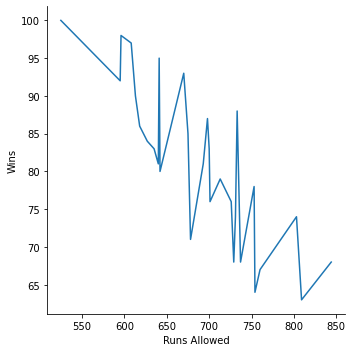

In [19]:
sns.relplot(x='Runs Allowed',y='Wins',data=df,kind='line')

We can see negative relationship between Wins and Runs Allowed column.

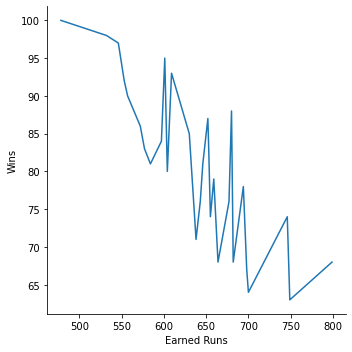

In [20]:
sns.relplot(x='Earned Runs',y='Wins',data=df,kind='line')

We can see negative relationship between Wins and Earned Runs column.

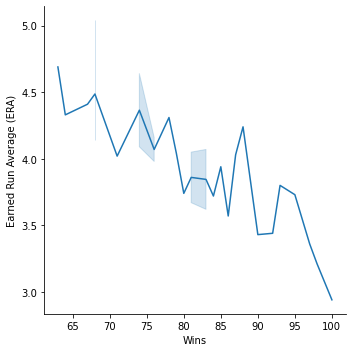

In [21]:
sns.relplot(x='Wins',y='Earned Run Average (ERA)',data=df,kind='line')

We can see negative relationship between Wins and Earned Run Average column.

<AxesSubplot:ylabel='Frequency'>

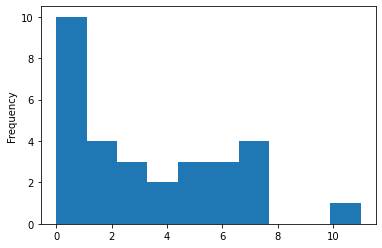

In [22]:
df['Complete Game'].plot.hist()

Maximum value in complete Game columns are 0 and 1, also we it does not contain value value 8 and 9.

<Figure size 432x288 with 0 Axes>

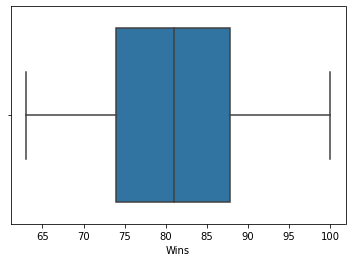

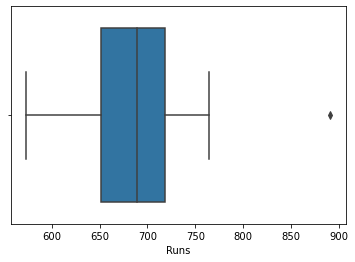

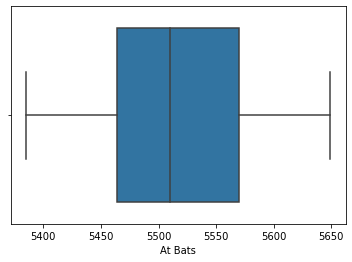

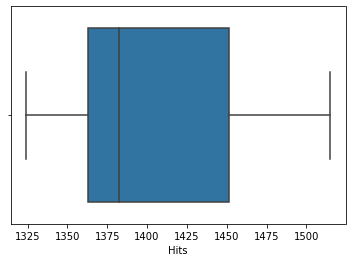

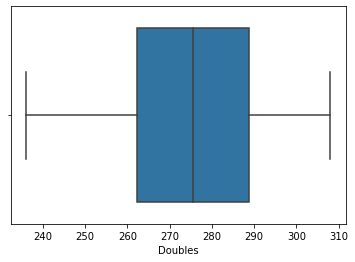

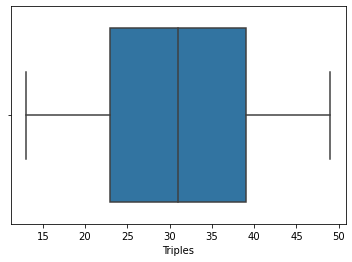

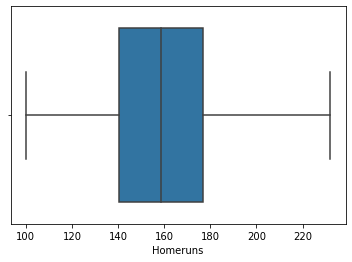

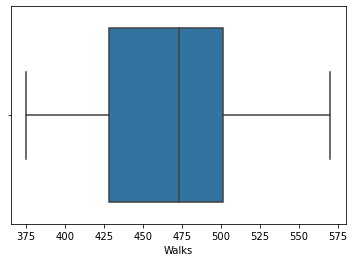

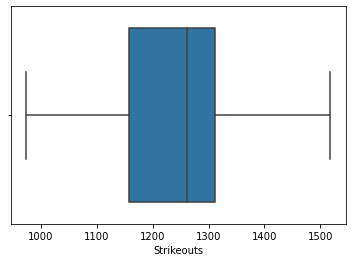

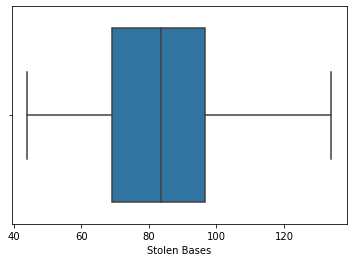

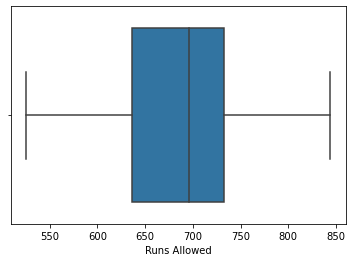

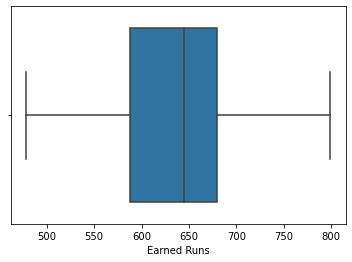

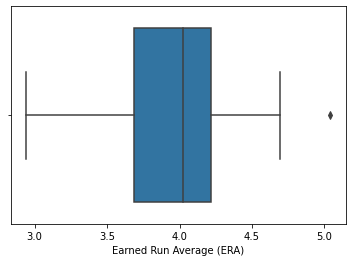

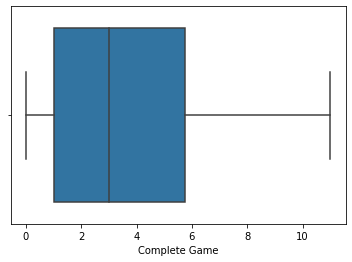

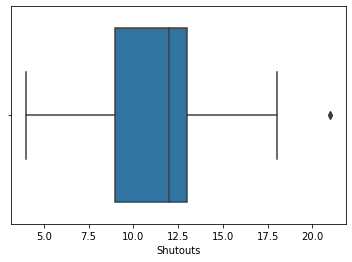

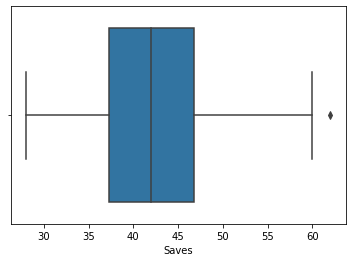

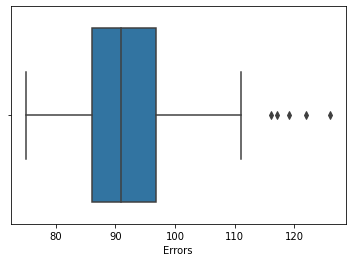

In [23]:
plt.figure()
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])

We can see there are some outliers in some columns

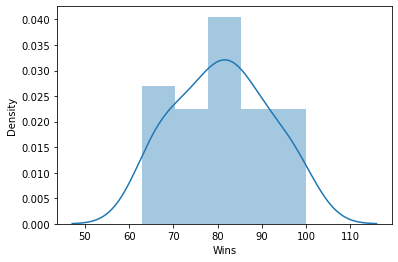

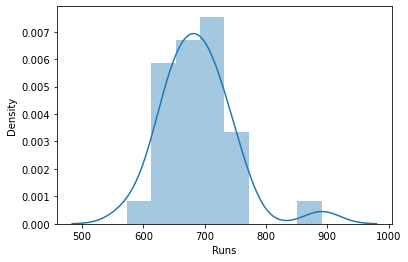

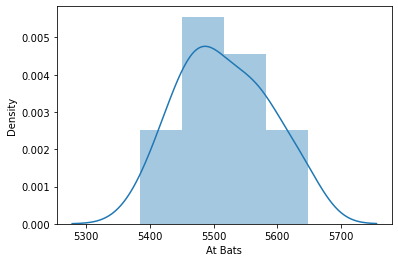

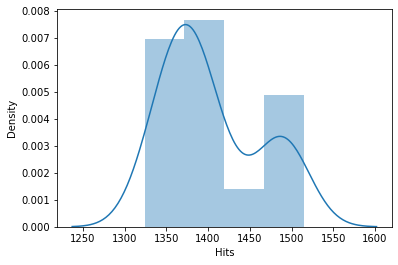

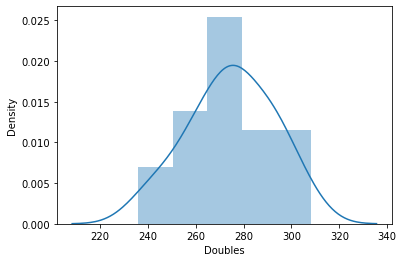

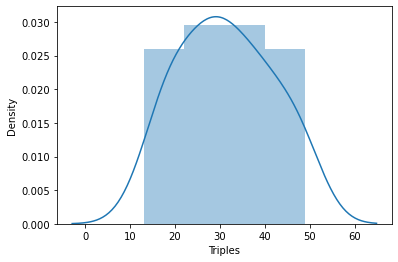

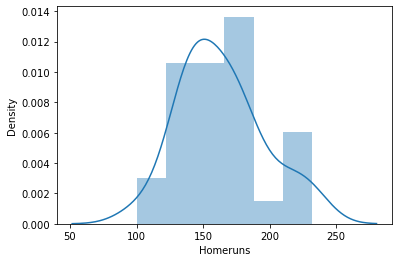

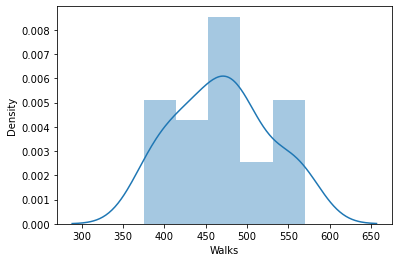

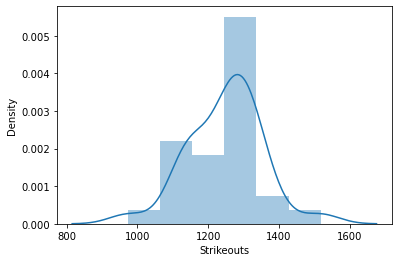

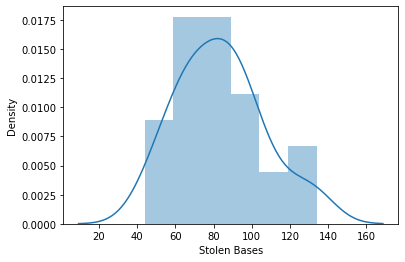

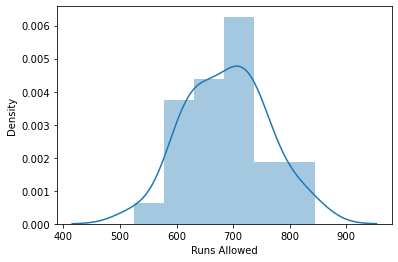

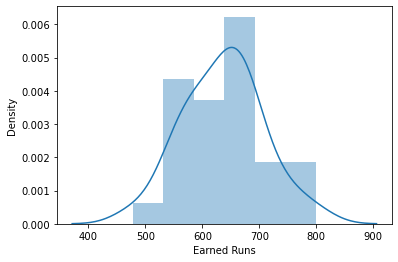

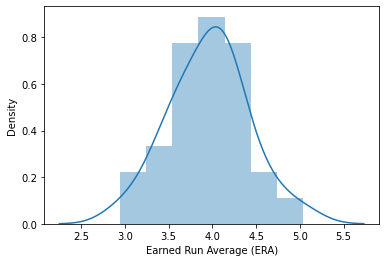

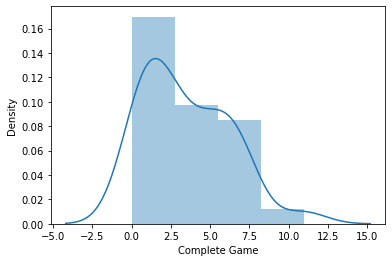

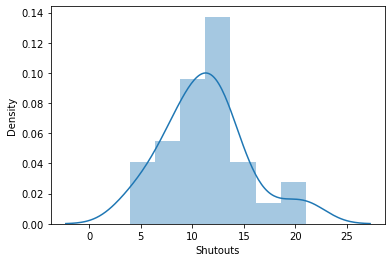

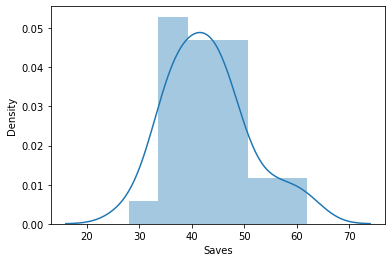

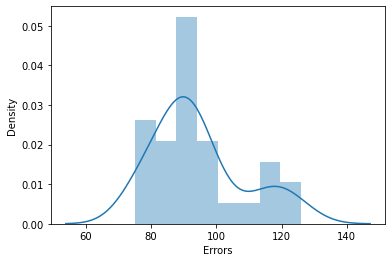

In [24]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],kde=True)

We can see distribution is uneven in some columns

In [25]:
df.skew()

Wins                        0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Complete Game               0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

All the values of skewness are in range of -0.5 to +0.5 except Runs,Hits,Complete Game,Saves and Errors column.

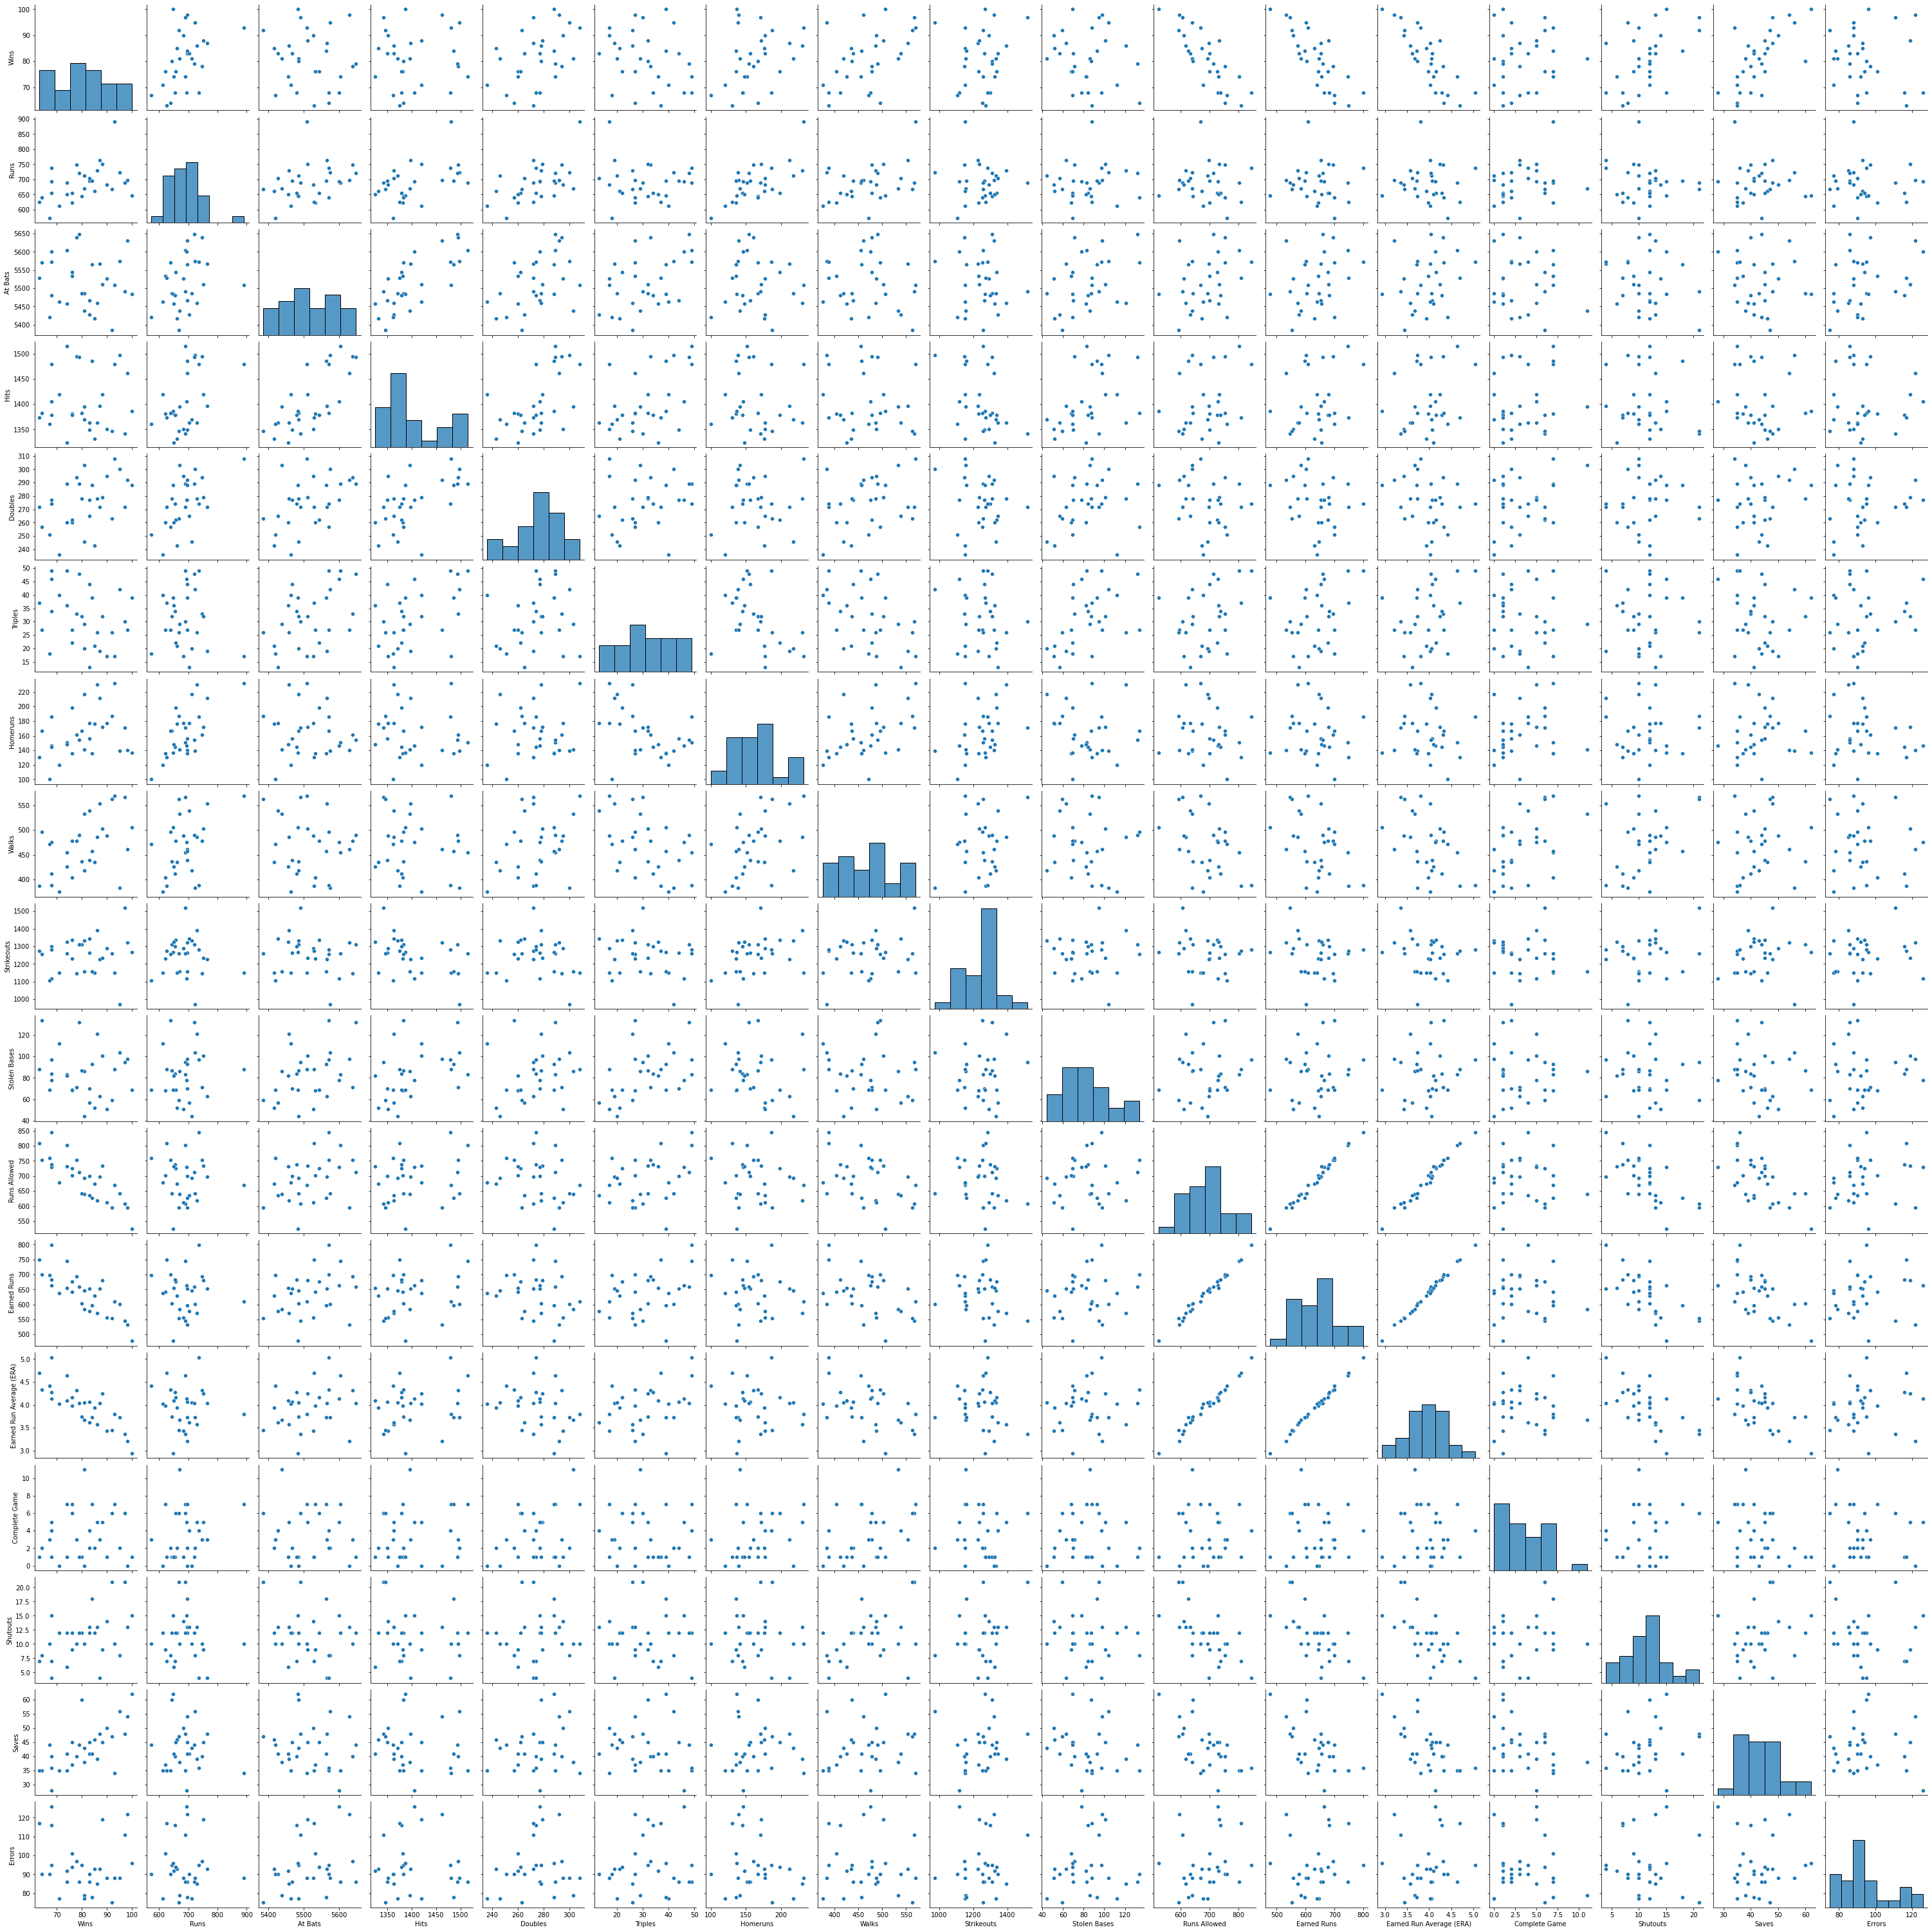

In [26]:
sns.pairplot(df)

here we can see that all dataset are lies in your nature

# describe the datasets:

In [27]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


there is a large difference between 75% and maximum for some columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

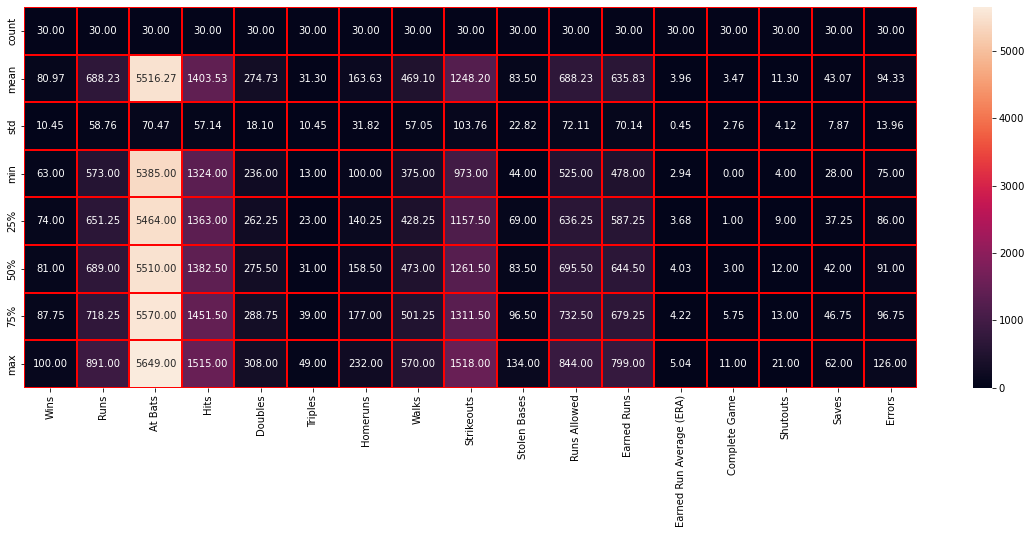

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [29]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Game,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

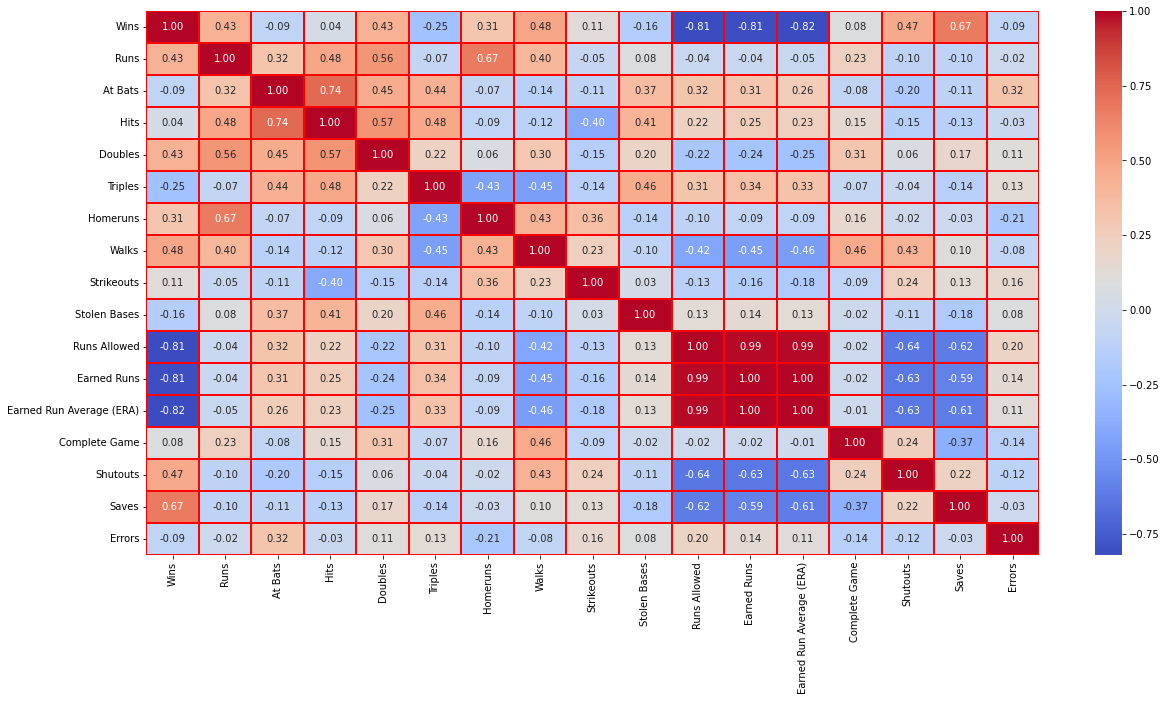

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

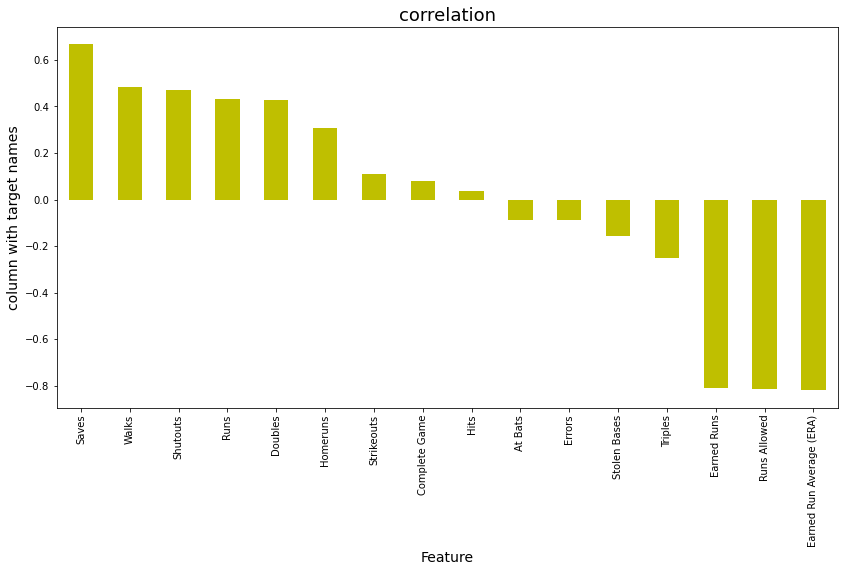

In [31]:
plt.figure(figsize=(14,7))
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Our target column 'wins' has high positive correlation with Runs, Doubles, homeruns, walks, shutouts and saves columns, whereas it has high negavtive correlation with Runs Allowed, Earned Runs and Earned Run Average(ERA)

# outliers and Skewness removal:

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


now remove all outliers

In [34]:
df_new.shape

(29, 17)

In [35]:
df.shape

(30, 17)

In [36]:
data_loss=((30-29)/30)*100
data_loss

3.3333333333333335

percentage of data loss is 3.33

In [37]:
x=df_new.drop("Wins",axis=1)
y=df_new["Wins"]
print(x.shape)
print(y.shape)

(29, 16)
(29,)


separating features columns which is denoting x and target columns(y)

In [38]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [39]:
df_new.skew()

Runs                       -0.024842
At Bats                     0.000000
Hits                        0.000000
Doubles                    -0.052793
Triples                    -0.075139
Homeruns                    0.000448
Walks                      -0.008572
Strikeouts                  0.051530
Stolen Bases               -0.009570
Runs Allowed               -0.011974
Earned Runs                -0.004988
Earned Run Average (ERA)   -0.000401
Complete Game              -0.045947
Shutouts                    0.000529
Saves                      -0.000925
Errors                      0.065585
dtype: float64

now skewness has been remove using power transform

# Let's perform standardization:

In [40]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m.fit_transform(df_new)

array([[0.76269627, 0.        , 0.        , 0.94306171, 0.83055597,
        0.37845433, 0.04858078, 0.        , 0.75316743, 0.36980291,
        0.38755651, 0.37917067, 0.3808006 , 0.30735723, 0.87953892,
        0.41348317],
       [0.6054643 , 0.        , 0.        , 0.54664436, 0.87977593,
        0.51619636, 0.36894124, 0.49499186, 0.39079849, 0.55497703,
        0.54963105, 0.54117529, 0.3808006 , 0.55375063, 0.61322186,
        0.36116914],
       [0.46072024, 0.        , 0.        , 1.        , 0.49111863,
        0.39536189, 0.84374811, 0.30231579, 0.57576535, 0.36664857,
        0.33435729, 0.35051186, 1.        , 0.43591836, 0.40026187,
        0.14781417],
       [0.22471302, 0.        , 0.        , 0.29657883, 0.43521083,
        0.35271091, 0.17258737, 0.43427304, 0.36534072, 0.5581003 ,
        0.51853669, 0.49835565, 0.8005316 , 0.3731705 , 0.3661082 ,
        0.68491843],
       [0.56729207, 0.        , 0.        , 0.74478689, 1.        ,
        0.47703203, 0.45481432, 

In [41]:
x=df_new #transfer into x

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [43]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.9508451216581015  at Random State  104


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [45]:
model=[LinearRegression(),DecisionTreeRegressor(),Lasso(alpha=0.0001),Ridge(alpha=0.0001),ElasticNet(alpha=0.0001)]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.9508451216581015
mean_absolute_error: 2.3946846943886775
mean_squared_error: 6.123878593428187
Root mean_squared_error: 2.4746471654416085


Accuracy Score of DecisionTreeRegressor() is: 0.48361204013377923
mean_absolute_error: 6.666666666666667
mean_squared_error: 64.33333333333333
Root mean_squared_error: 8.020806277010642


Accuracy Score of Lasso(alpha=0.0001) is: 0.9503014827475715
mean_absolute_error: 2.4248853724357438
mean_squared_error: 6.191606941031712
Root mean_squared_error: 2.488293982035023


Accuracy Score of Ridge(alpha=0.0001) is: 0.9508485435007392
mean_absolute_error: 2.394763012141945
mean_squared_error: 6.123452288866242
Root mean_squared_error: 2.474561029529529


Accuracy Score of ElasticNet(alpha=0.0001) is: 0.9503664324556302
mean_absolute_error: 2.4230977915179133
mean_squared_error: 6.183515289902727
Root mean_squared_error: 2.4866675069061257




# Cross Validation Model:

In [46]:
model=[LinearRegression(),DecisionTreeRegressor(),Lasso(alpha=0.0001),Ridge(alpha=0.0001),ElasticNet(alpha=0.0001)]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.3761324121236935
Score for DecisionTreeRegressor() is:  -2.315652999836975
Score for Lasso(alpha=0.0001) is:  0.42897064361953124
Score for Ridge(alpha=0.0001) is:  0.3789110911991612
Score for ElasticNet(alpha=0.0001) is:  0.43281985484025187


With ElasticNet model there is very less difference in accuracy and cross validation score, Hence the best model is ElasticNet.

# Hyper Parameter Tunning:

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters={"max_iter": [1, 5, 10],
            "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            "l1_ratio": np.arange(0.0, 1.0, 0.1),
           'random_state':range(1,20)}

In [49]:
GCV=GridSearchCV(ElasticNet(),parameters,cv=5)

In [50]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10], 'random_state': range(1, 20)})

In [51]:
GCV.best_params_

{'alpha': 1, 'l1_ratio': 0.8, 'max_iter': 5, 'random_state': 1}

In [52]:
Final_mod= ElasticNet(alpha=1,l1_ratio=0.8,max_iter=5,random_state=1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

81.77550703849363


After performing GridSearchCV method accuarcy is 81.77%

# saving the best model:

In [54]:
import pickle
filename= 'baseball_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [55]:
#load the model from the disk

loaded_model = pickle.load(open('baseball_prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8177550703849363


In [56]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5
Predicted,88.620578,71.082336,71.840278,89.350496,77.521026,81.036923
Orginal,88.620578,71.082336,71.840278,89.350496,77.521026,81.036923


In [ ]:
#end